In [1]:
library('Seurat')
library('dplyr')
library('tidyr')
library('ggplot2')
library('Matrix')
library(tibble)
# library(SeuratDisk)
library('RColorBrewer')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [18]:
library(patchwork)

In [2]:
anno_col = list(
#     response_short = c(PRO = "rosybrown1", R = "lightgreen", '0' = 'gray95', PD = 'tomato'), 
#     treatment_group = c(ICI_PD1 = 'paleturquoise1', ICI_combo = 'turquoise', '0' = 'gray95'),
     sex = c(M = 'lightblue2', F = 'mistyrose'), 
     state = c(PRE = 'palegoldenrod', ON ='gold1', POST ='sandybrown'),
#      subtype = c(cutaneous = 'honeydew2', uveal = 'lightgoldenrodyellow', 
#                  mucosal = 'mistyrose2', 'unknown primary' = 'gray95'),
#      tissue = c(skin = 'lightskyblue1', breast = 'darkolivegreen3', liver = 'seagreen1',
#                  lymph = 'lightseagreen', brain = 'cyan', soft = 'steelblue1', colon = 'darkcyan',
#                 bone = 'seagreen3', '0' = 'gray95'),
    age = colorRampPalette(brewer.pal(4, "Blues")) (40),
    day = colorRampPalette(brewer.pal(4, "RdPu")) (40),
    pfs = colorRampPalette(brewer.pal(4, "Greys")) (40),
     ncells = colorRampPalette(brewer.pal(4, "Greens")) (40)  
               )

# Load files

In [3]:
filenames <- list.files("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/sample_rds/",
                        pattern="mt25.rds", full.names=TRUE)

In [4]:
obj.list <- lapply(filenames, readRDS)

In [6]:
obj <- merge(obj.list[[1]], obj.list[-1], merge.data = TRUE)

In [7]:
obj <- obj %>% subset(subset = percent_mt <10)

In [8]:
obj

An object of class Seurat 
54841 features across 222351 samples within 2 assays 
Active assay: SCT (26546 features, 0 variable features)
 1 other assay present: RNA

In [9]:
saveRDS(obj, "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_immune020922.rds")


In [10]:
obj <- obj %>% subset(subset = general_cell_type == 'Myeloid')

## Filter cell types

In [5]:
obj.list <- lapply(X = obj.list, FUN = function(x) {
    x <- subset(x, subset = general_cell_type == 'Myeloid' & percent_mt <10)
})

# RPCA integration

In [7]:
features <- SelectIntegrationFeatures(object.list = obj.list, nfeatures = 3000)
obj.list <- PrepSCTIntegration(object.list = obj.list, anchor.features = features)

In [21]:
obj.list <- lapply(X = obj.list, FUN = RunPCA, features = features,  npcs = 30, verbose = FALSE)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


In [25]:
obj.list

[[1]]
An object of class Seurat 
43752 features across 174 samples within 2 assays 
Active assay: SCT (15457 features, 3000 variable features)
 1 other assay present: RNA
 1 dimensional reduction calculated: pca

[[2]]
An object of class Seurat 
45132 features across 359 samples within 2 assays 
Active assay: SCT (16837 features, 3000 variable features)
 1 other assay present: RNA
 1 dimensional reduction calculated: pca

[[3]]
An object of class Seurat 
44527 features across 504 samples within 2 assays 
Active assay: SCT (16232 features, 3000 variable features)
 1 other assay present: RNA
 1 dimensional reduction calculated: pca

[[4]]
An object of class Seurat 
44308 features across 47 samples within 2 assays 
Active assay: SCT (16013 features, 3000 variable features)
 1 other assay present: RNA
 1 dimensional reduction calculated: pca

[[5]]
An object of class Seurat 
42695 features across 244 samples within 2 assays 
Active assay: SCT (14400 features, 3000 variable features)
 1 oth

In [16]:
#remove samples <30 cells
# obj.list <- obj.list[-c(30)]

In [39]:
anchors <- FindIntegrationAnchors(object.list = obj.list, normalization.method = "SCT",
    anchor.features = features, dims = 1:30, reduction = "rpca", k.anchor = 30, reference = c(1,5,10,15,20,25,20,35))
obj.rpca2 <- IntegrateData(anchorset = anchors, normalization.method = "SCT", dims = 1:30, k.weight = 40)

Computing within dataset neighborhoods

Finding anchors between all query and reference datasets

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1946 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1731 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1156 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1307 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2087 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2343 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1211 anchors

Projecting new data onto SVD

Projecting new data onto 

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3509 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3612 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1167 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1728 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2430 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2511 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 4081 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 4069 anchors

Projecting new data onto SVD

Pr

	Found 1131 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2128 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1911 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3897 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2112 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3526 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1197 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2118 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2129 anchors

Projecting 

Finding anchors

	Found 3287 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3992 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2116 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 4088 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2544 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1162 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2480 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3936 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3758 anc

Integrating dataset 30 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data

Integrating dataset 31 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data

Integrating dataset 32 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data

Integrating dataset 33 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data

Integrating dataset 34 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data

Integrating dataset 36 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data

Integrating dataset 37 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data

Integrating dataset 38 with reference dataset

Finding integration vectors

Finding integr

#  PCA & UMAP

In [42]:
obj.rpca

An object of class Seurat 
57840 features across 16379 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT

In [43]:
obj.rpca <- RunPCA(obj.rpca, verbose = FALSE)
obj.rpca <- RunUMAP(obj.rpca, reduction = "pca", dims = 1:30,verbose = FALSE)

In [21]:
options(repr.plot.height = 10, repr.plot.width = 20)

p1 <- DimPlot(obj.rpca, reduction = "umap", group.by = "uid",   
              label.size = 3, repel = TRUE)
p2 <- DimPlot(obj.rpca, reduction = "umap", group.by = "tissue",  cols =anno_col$tissue ,
              label.size = 3, repel = TRUE)
p3 <- DimPlot(obj.rpca, reduction = "umap", group.by =  "treatment_group",  cols =anno_col$treatment_group , 
              label.size = 3, repel = TRUE)
p4 <- DimPlot(obj.rpca, reduction = "umap", group.by =  "state",  cols =anno_col$state , 
              label.size = 3, repel = TRUE)

p5 <- FeaturePlot(obj.rpca, features = c('day') ,  reduction = "umap", )
p6 <- FeaturePlot(obj.rpca, features = 'pfs' ,  reduction = "umap", )

# p1+p2+p3+p4 +p5+p6

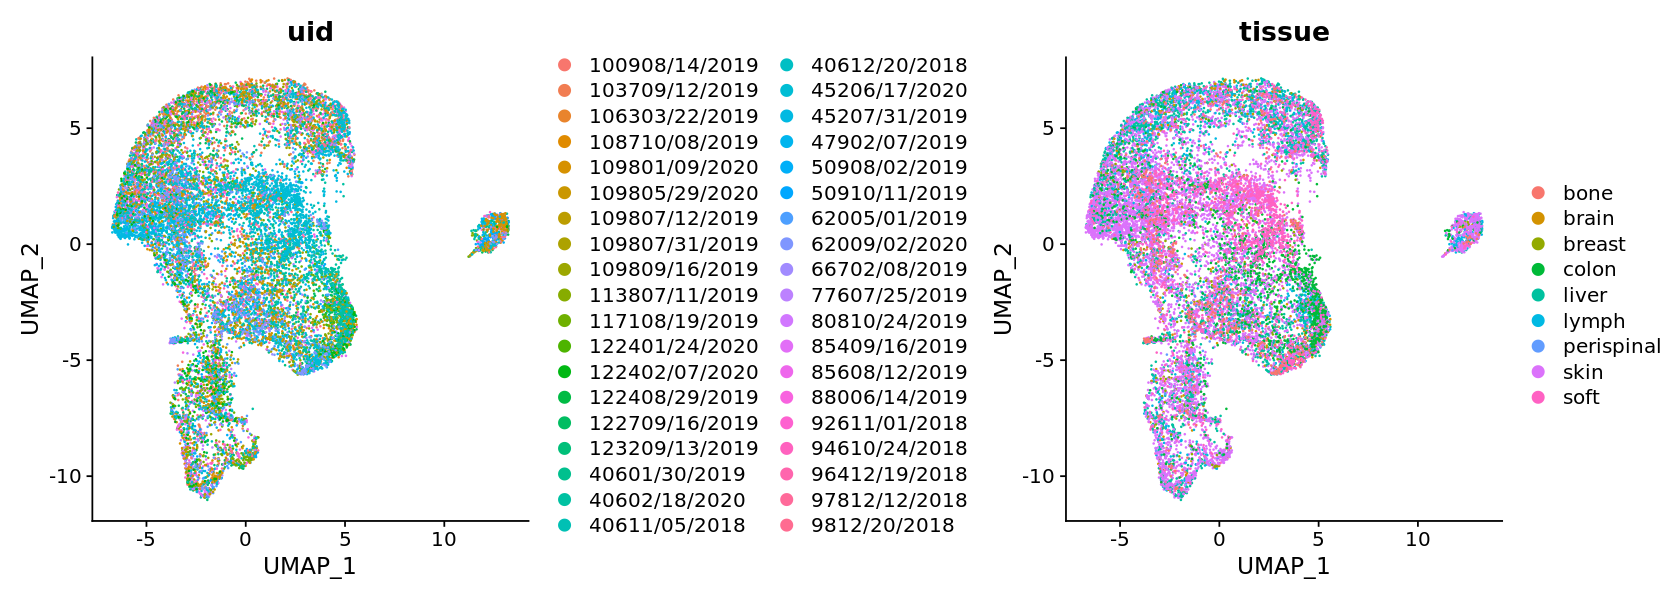

In [22]:
options(repr.plot.height = 5, repr.plot.width = 14)
p1+p2

In [47]:
DefaultAssay(object = obj.rpca) <- "SCT"

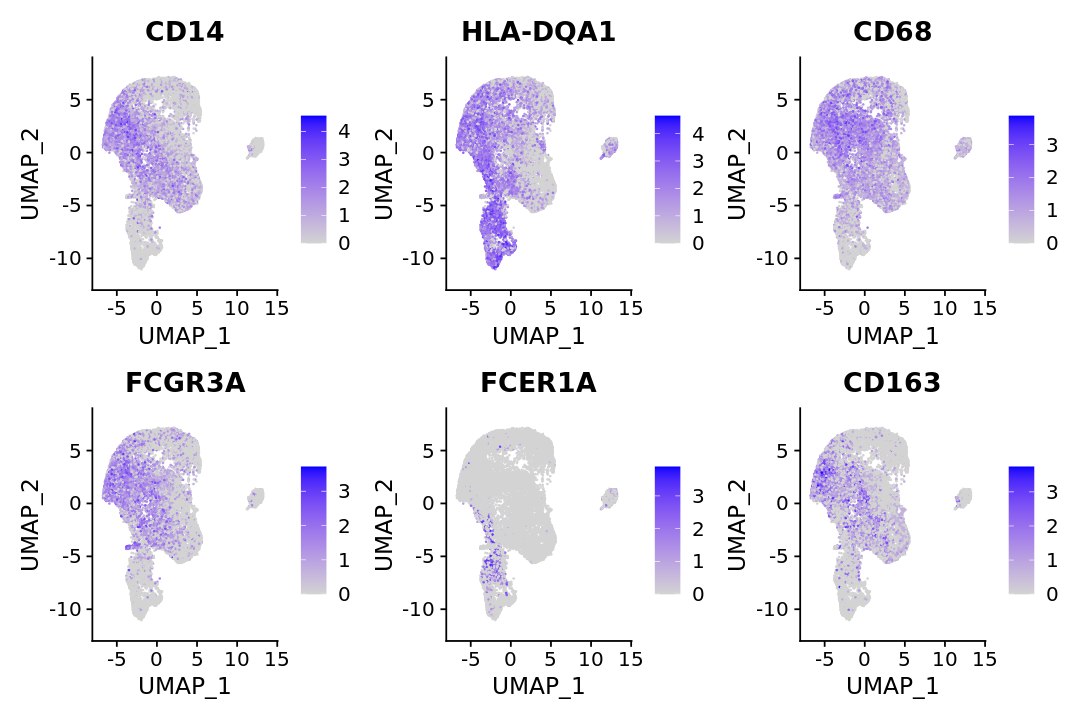

In [9]:
options(repr.plot.height = 6, repr.plot.width = 9)
FeaturePlot(obj.rpca, features = c('CD14', 'HLA-DQA1', 'CD68', 'FCGR3A','FCER1A','CD163'), ncol = 3,
            reduction = "umap")

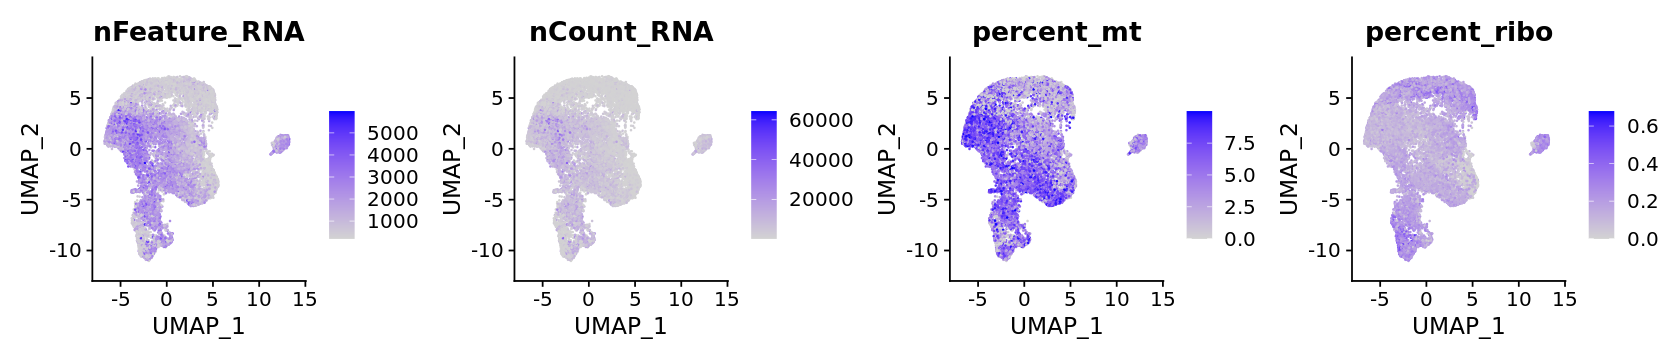

In [83]:
options(repr.plot.height = 3, repr.plot.width = 14)
FeaturePlot(obj.rpca, features = c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_ribo" ),
            ncol = 4,
            reduction = "umap")

# cell marker

In [3]:
obj.rpca <- readRDS( "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_myeloid021022.rds")


In [3]:
# obj.rpca <- readRDS('/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_myeloid020922.rds')

In [11]:
DefaultAssay(object = obj.rpca) <- "SCT"

In [9]:
features = c('LILRA4','GZMB','IL3RA', 'CLEC9A', 'CD1C','BIRC3', 'FCN1','S100A8','S100A9', 'C1QC','APOE','GPNMB')

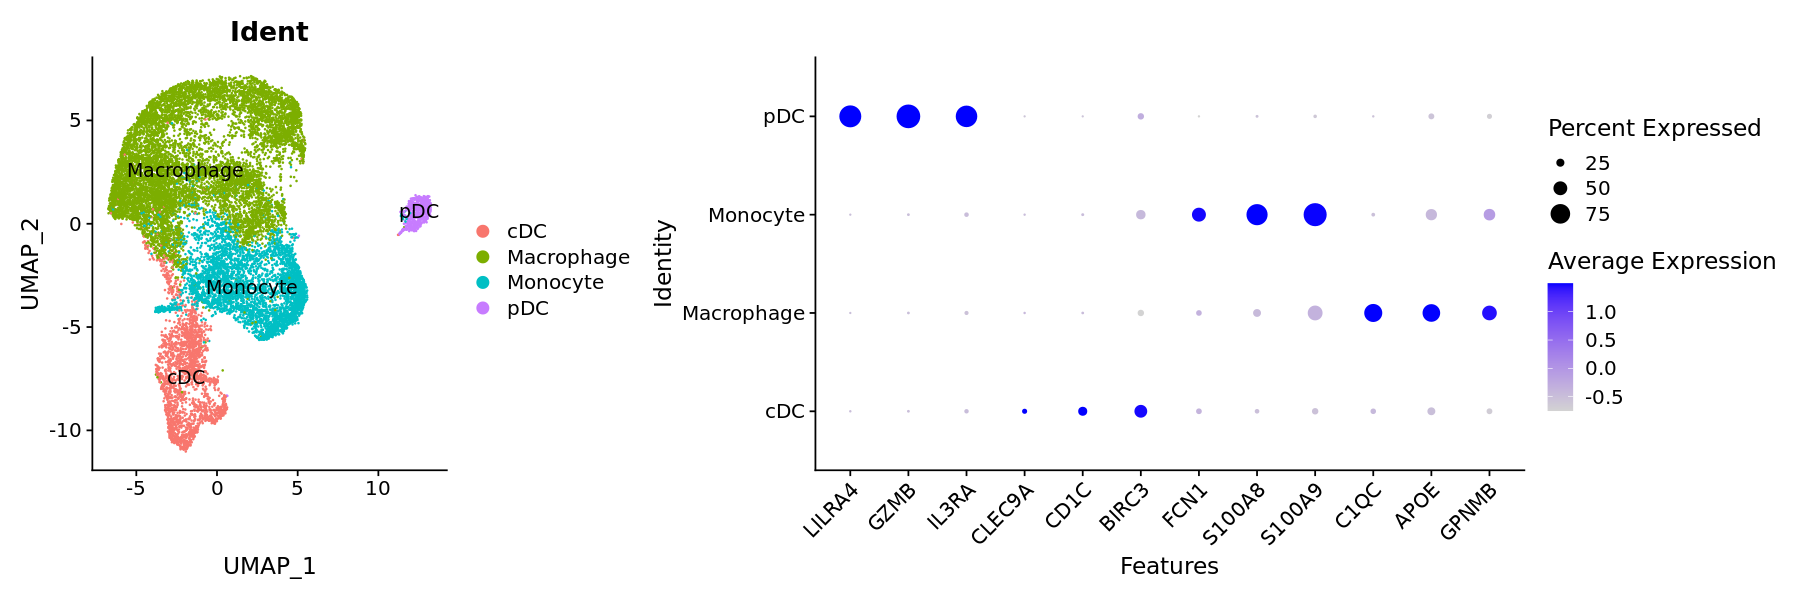

In [20]:
options(repr.plot.height = 5, repr.plot.width = 15)
p1 <- DimPlot(obj.rpca, reduction = "umap",group.by = "Ident", label = TRUE)
p2 <- DotPlot(object = obj.rpca, features = features, group.by = 'Ident')+
  theme(axis.text.x = element_text(angle=45, size =12, vjust=1, hjust=1))
p1+p2+plot_layout(widths = c(1, 2))

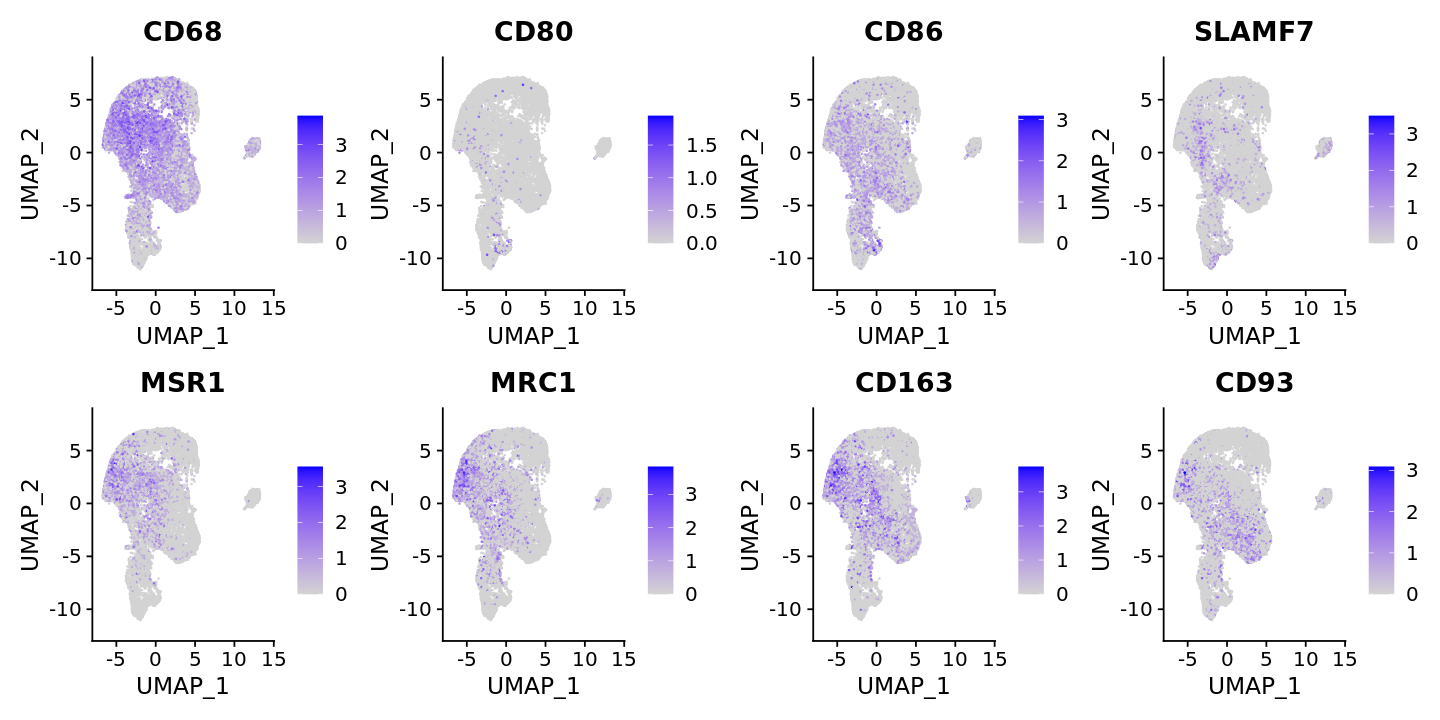

In [51]:
options(repr.plot.height = 6, repr.plot.width = 12)
FeaturePlot(obj.rpca, features = c('CD68','CD80', 'CD86','SLAMF7',
            'MSR1', 'MRC1','CD163', 'CD93'), ncol = 4,
            reduction = "umap")

In [24]:
Idents(obj.rpca) <- "integrated_snn_res.0.6"
cDC3markers <- FindMarkers(obj.rpca, ident.1 = 12, min.pct = 0.25)

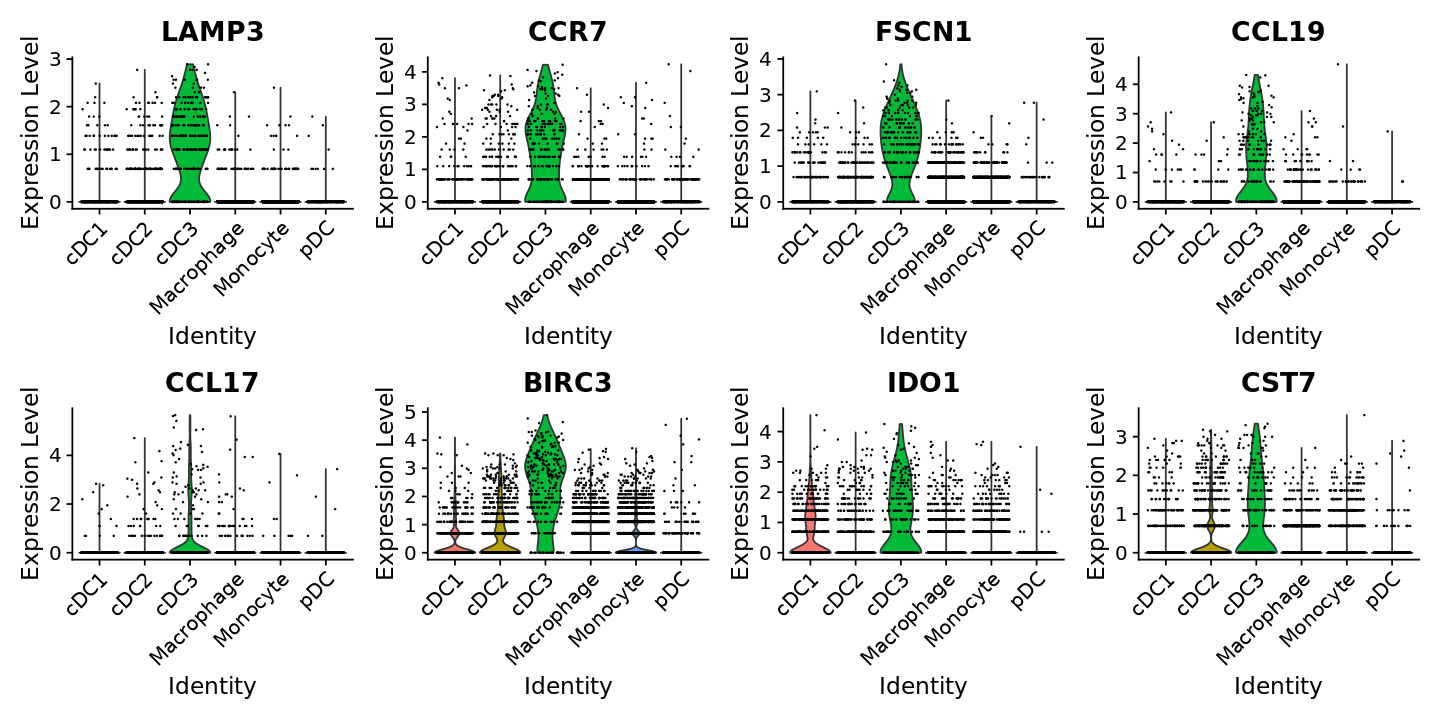

In [29]:
options(repr.plot.height = 6, repr.plot.width = 12)

VlnPlot(
  object = obj.rpca,
  features = c( 'LAMP3','CCR7', 'FSCN1','CCL19','CCL17','BIRC3','IDO1', 'CST7'),
  group.by = 'Ident', ncol = 4
)

# Clustering

In [53]:
obj.rpca

An object of class Seurat 
57840 features across 16379 samples within 3 assays 
Active assay: SCT (26545 features, 0 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [55]:
DefaultAssay(object = obj.rpca) <- "integrated"

In [60]:
# obj.rpca <- FindNeighbors(obj.rpca, dims = 1:30, reduction = 'pca')
obj.rpca<- FindClusters(obj.rpca, resolution = c(0.3))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16379
Number of edges: 669684

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9119
Number of communities: 9
Elapsed time: 1 seconds


In [4]:
names(obj.rpca[[]])

[1] "sample_ID"              "is_multiplet"           "cell_barcode"          
 [4] "total_counts"           "percent_ribo"           "percent_heme"          
 [7] "n_genes"                "compartment"            "general_cell_type"     
[10] "sample_ID_long"         "patient"                "uid"                   
[13] "age"                    "sex"                    "subtype"               
[16] "treatment_group"        "prior_therapy"          "state"                 
[19] "response"               "tissue"                 "day"                   
[22] "pfs"                    "nCount_RNA"             "nFeature_RNA"          
[25] "percent_mt"             "nCount_SCT"             "nFeature_SCT"          
[28] "integrated_snn_res.0.4" "integrated_snn_res.0.6" "seurat_clusters"       
[31] "integrated_snn_res.0.3" "Ident"

In [5]:
meta <- obj.rpca[[]] %>% 
       mutate(Ident = case_when(
             integrated_snn_res.0.3 %in% c(1,6)   ~ 'Monocyte',
           integrated_snn_res.0.3 %in% c(4,8)  ~ 'cDC',
           integrated_snn_res.0.6 == 10 ~ 'pDC',
           integrated_snn_res.0.3 %in% c(0,2,3,5) ~ 'Macrophage',
             TRUE ~ 'Macrophage'))

In [6]:
obj.rpca@meta.data <- meta

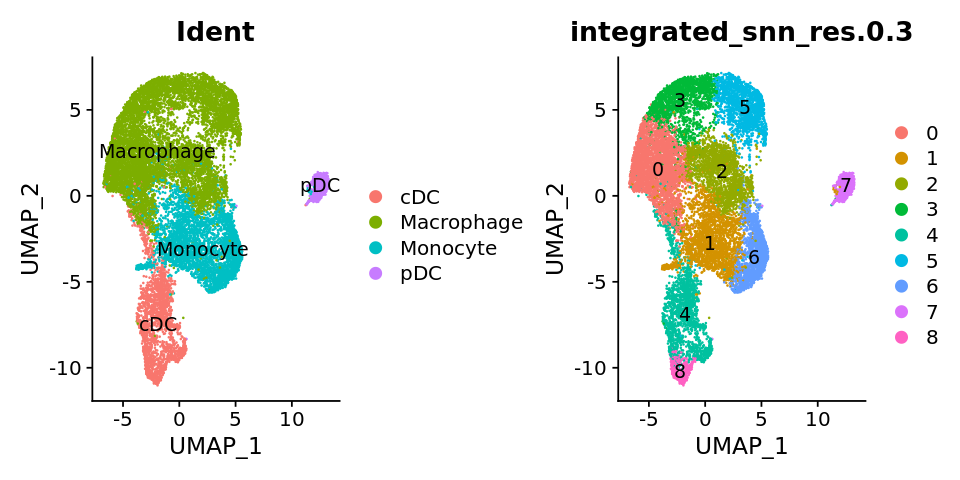

In [7]:
options(repr.plot.height = 4, repr.plot.width = 8)
p1 <- DimPlot(obj.rpca, reduction = "umap",group.by = "Ident", label = TRUE)
p2 <- DimPlot(obj.rpca, reduction = "umap",group.by = "integrated_snn_res.0.3", label = TRUE)

p1+p2

In [63]:
obj.rpca[['Ident']] <- obj.rpca[["integrated_snn_res.0.4"]] 

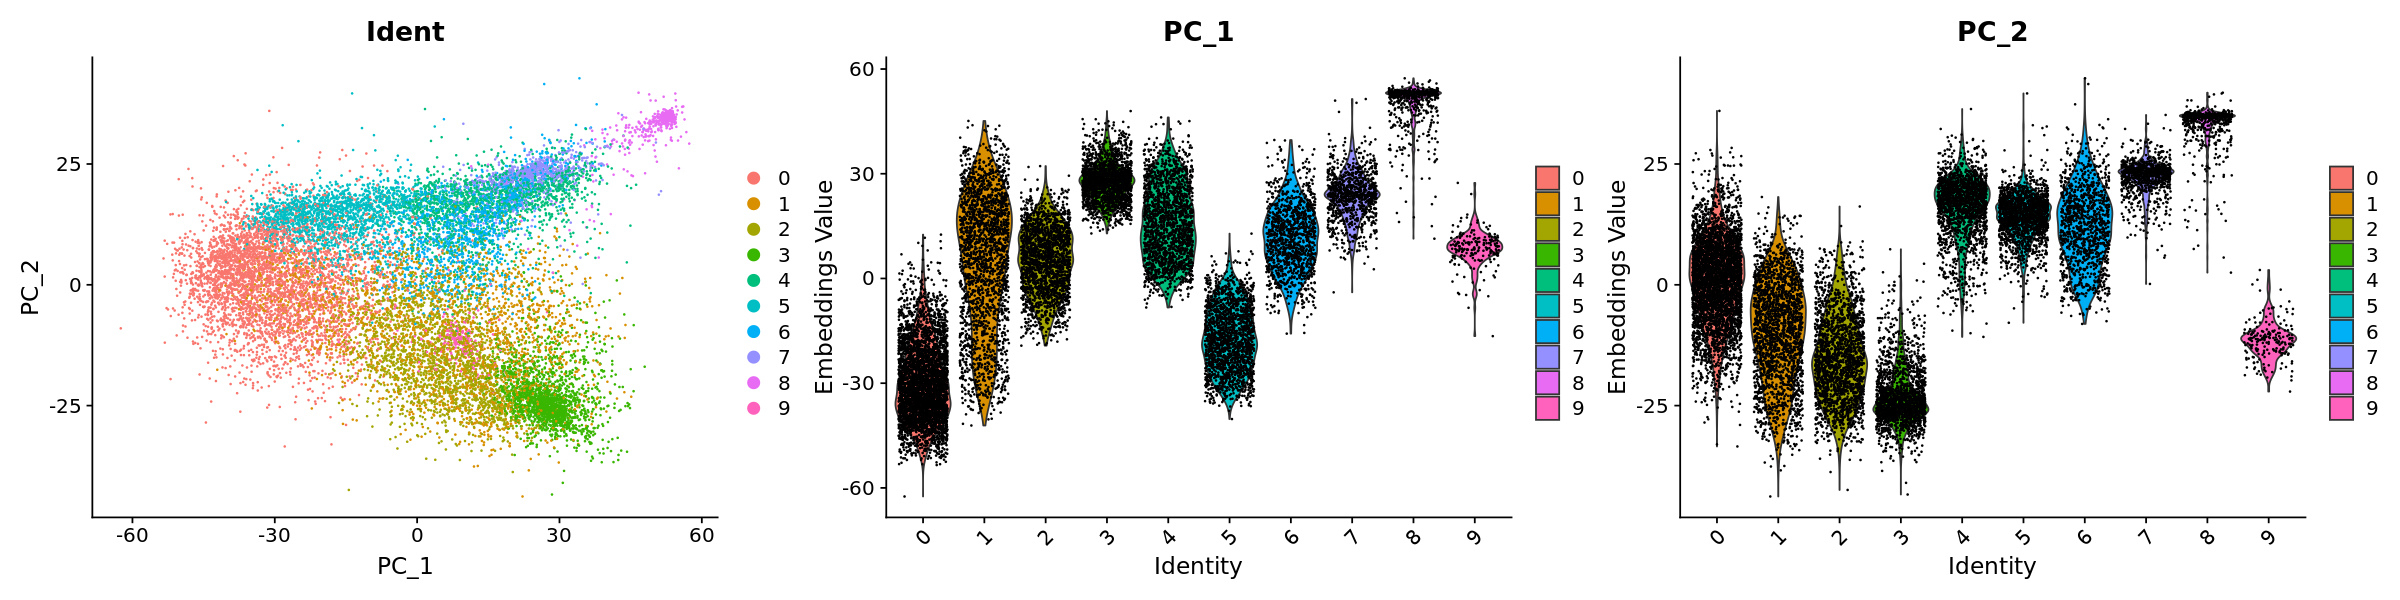

In [64]:
options(repr.plot.height = 5, repr.plot.width = 20)
p1 <- DimPlot(object = obj.rpca, reduction = "pca", pt.size = .1, group.by = "Ident")
p2 <- VlnPlot(object = obj.rpca, features = "PC_1", group.by = "Ident", pt.size = .1)
p3 <- VlnPlot(object = obj.rpca, features = "PC_2", group.by = "Ident", pt.size = .1)
p1+p2+p3

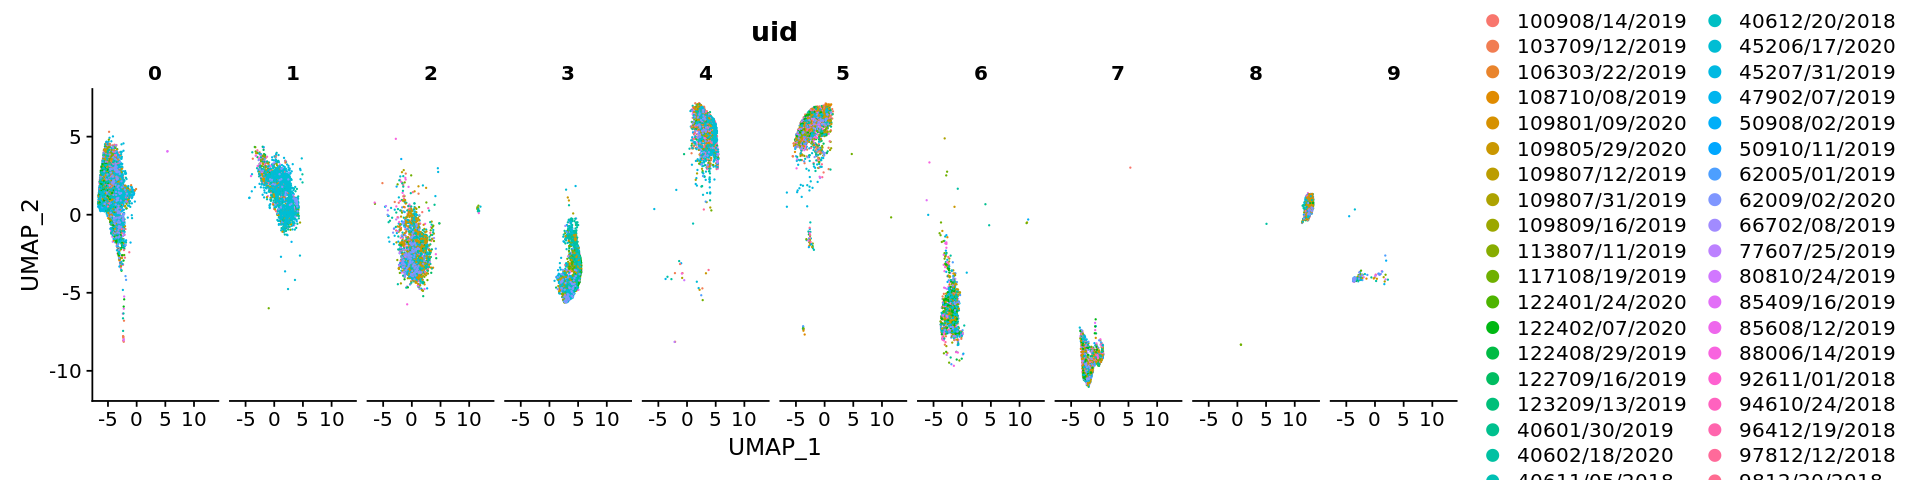

In [65]:
options(repr.plot.height = 4, repr.plot.width = 16)

DimPlot(obj.rpca, reduction = "umap", split.by = "Ident",   
               group.by = 'uid',pt.size = 0.01)

In [22]:
table(CD8T[[c('uid', 'SCT_snn_res.0.6')]])

                SCT_snn_res.0.6
uid                 0    1    2    3    4    5    6    7    8    9   10
  100908/14/2019   57   38   36  168   56   14    5  718    9    4    0
  103709/12/2019  118   75   38   70   43   28   18    1   11   20   10
  106303/22/2019   25    6    7    2    9    7    5    0    1    1    0
  108710/08/2019   72   53   61   21   30   49    7    0    8    6    2
  109801/09/2020   64   81   26   18   25   53    3    0    7    4    0
  109805/29/2020   10    3    1    1    0    0    1    0    1    0    0
  109807/12/2019  325  100   25   11   45   59   24    0   12    5    8
  109807/31/2019  222   35   21    6   28   24    8    0   27    8    0
  109809/16/2019  419  157  237  340  352  112    9    0   11   88   53
  113807/11/2019   30   23   51   66   14   18    3    1    1    1    0
  117108/19/2019    5   24   48   15   80    9    1    6   12    2    1
  122401/24/2020   78   33   16    9    7   21    0    0    0    2    0
  122402/07/2020  135  163  123 

In [21]:
# cDC <- subset(obj.rpca, subset = (integrated_snn_res.0.3 ==4 | integrated_snn_res.0.3 ==8))
# mono_macro <- subset(obj.rpca, subset = integrated_snn_res.0.3 %in% c(0,1,2,3,5,6))
saveRDS(cDC, "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_cDC021022.rds")
saveRDS(mono_macro, "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_mono_macro021022.rds")


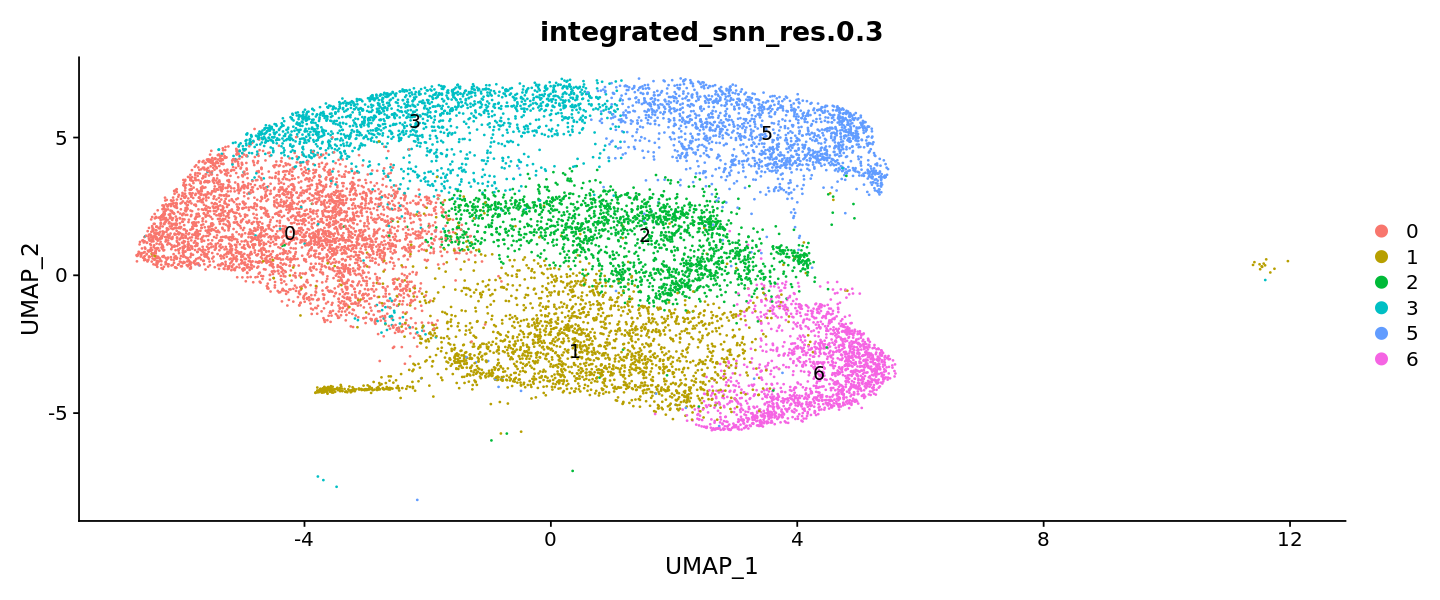

In [20]:
DimPlot(mono_macro, reduction = "umap",group.by = "integrated_snn_res.0.3", label = TRUE)


In [66]:
saveRDS(obj.rpca, "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_myeloid021022.rds")


In [2]:
obj.rpca <- readRDS( "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_myeloid021022.rds")
